# **Model_Telco_dataset**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import acquire
import prepare
from acquire import get_telco_data
from prepare import prep_telco_data
from prepare import split_telco_data
import warnings
warnings.filterwarnings('ignore')


# import splitting and imputing functions
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score



# Remove limits on viewing dataframes
pd.set_option('display.max_columns', None)


import seaborn as sns



In [2]:
# acquire the data
df = get_telco_data()
# prepare the data
train, validate, test = prep_telco_data(df)

In [3]:
df.head(2).T

,0,1
gender,Female,Male
senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
tenure,9,9
phone_service,Yes,Yes
multiple_lines,No,Yes
online_security,No,No
online_backup,Yes,No
device_protection,No,No


In [4]:
df.isna().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [6]:
df.describe()

,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.columns.to_list()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [8]:
numcols = [col for col in df.columns if df[col].dtype != 'O']

In [9]:
catcols = [col for col in df.columns if df[col].dtype == 'O']

In [10]:
catcols

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [11]:
for col in catcols:
    print(f"Columns: {col}")
    print(df[col].value_counts())
    print("----------")
    print(df[col].value_counts(normalize=True, dropna=False))
    print("=============")

Columns: gender
Male      3555
Female    3488
Name: gender, dtype: int64
----------
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
Columns: partner
No     3641
Yes    3402
Name: partner, dtype: int64
----------
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
Columns: dependents
No     4933
Yes    2110
Name: dependents, dtype: int64
----------
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
Columns: phone_service
Yes    6361
No      682
Name: phone_service, dtype: int64
----------
Yes    0.903166
No     0.096834
Name: phone_service, dtype: float64
Columns: multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
----------
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64
Columns: online_security
No                     3498
Yes                    2019
No internet service    1526
Name: online_secur

senior_citizen


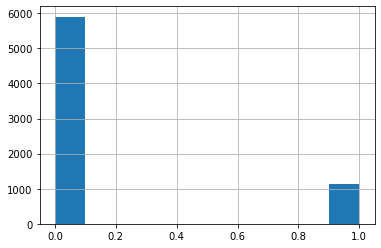

tenure


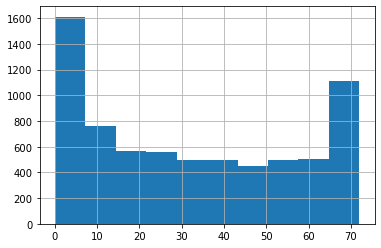

monthly_charges


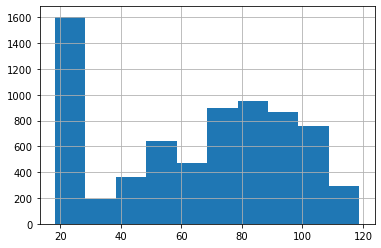

In [12]:
# histograms of numeric columns 
for col in numcols:
    print(col)
    df[col].hist()
    plt.show()

In [13]:
# Drop null values stored as whitespace    
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [14]:
# Convert to correct datatype
df['total_charges'] = df.total_charges.astype(float)

In [15]:
# Convert binary categorical variables to numeric
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [16]:
# Get dummies for non-binary categorical variables
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)

In [17]:
dummy_df.head()

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [18]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1


In [19]:
# Concatenate dummy dataframe to original 
df = pd.concat([df, dummy_df], axis=1)

In [20]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [21]:
df = df.drop(columns=['multiple_lines', \
                        'online_security', \
                        'online_backup', \
                        'device_protection', \
                        'tech_support', \
                        'streaming_tv', \
                        'streaming_movies', \
                        'contract_type', \
                        'internet_service_type', \
                        'payment_type', \
                        'gender', \
                        'partner', \
                        'dependents', \
                        'phone_service', \
                        'paperless_billing', \
                        'churn'])

In [22]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,4,73.9,280.85,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [23]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

In [40]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
   
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [41]:
df.isna().sum()

senior_citizen                           0
tenure                                   0
monthly_charges                          0
total_charges                            0
gender_encoded                           0
partner_encoded                          0
dependents_encoded                       0
phone_service_encoded                    0
paperless_billing_encoded                0
churn_encoded                            0
multiple_lines_no phone service          0
multiple_lines_yes                       0
online_security_no internet service      0
online_security_yes                      0
online_backup_no internet service        0
online_backup_yes                        0
device_protection_no internet service    0
device_protection_yes                    0
tech_support_no internet service         0
tech_support_yes                         0
streaming_tv_no internet service         0
streaming_tv_yes                         0
streaming_movies_no internet service     0
streaming_m

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float64
 4   gender_encoded                         7032 non-null   int64  
 5   partner_encoded                        7032 non-null   int64  
 6   dependents_encoded                     7032 non-null   int64  
 7   phone_service_encoded                  7032 non-null   int64  
 8   paperless_billing_encoded              7032 non-null   int64  
 9   churn_encoded                          7032 non-null   int64  
 10  multiple_lines_no phone service        7032 non-null   uint8  
 11  mult

**Train Model**

Create the object
- Create the Decision Tree object with desired hyper-parameters.

In [43]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='churn_encoded', seed=12345)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

In [44]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

**Fit the model**

Fit the random forest algorithm to the training data.

In [29]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)



**Visualize a Decision Tree**
By visualizing the decision tree, we can see the relative importance of different features. The most important features will be the first splits, and we can see how many observations in each category remain after each split.

[Text(362.7, 332.955, 'tenure <= 17.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(181.35, 237.825, 'internet_service_type_fiber optic <= 0.5\ngini = 0.495\nsamples = 1503\nvalue = [824, 679]\nclass = 0'),
 Text(90.675, 142.695, 'tenure <= 1.5\ngini = 0.405\nsamples = 847\nvalue = [608, 239]\nclass = 0'),
 Text(45.3375, 47.565, 'gini = 0.497\nsamples = 211\nvalue = [113, 98]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.345\nsamples = 636\nvalue = [495, 141]\nclass = 0'),
 Text(272.025, 142.695, 'total_charges <= 120.0\ngini = 0.442\nsamples = 656\nvalue = [216, 440]\nclass = 1'),
 Text(226.6875, 47.565, 'gini = 0.199\nsamples = 134\nvalue = [15, 119]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.474\nsamples = 522\nvalue = [201, 321]\nclass = 1'),
 Text(544.05, 237.825, 'internet_service_type_fiber optic <= 0.5\ngini = 0.256\nsamples = 2434\nvalue = [2067, 367]\nclass = 0'),
 Text(453.375, 142.695, 'contract_type_two year <= 0.5\ngini = 0.105\nsamples = 1

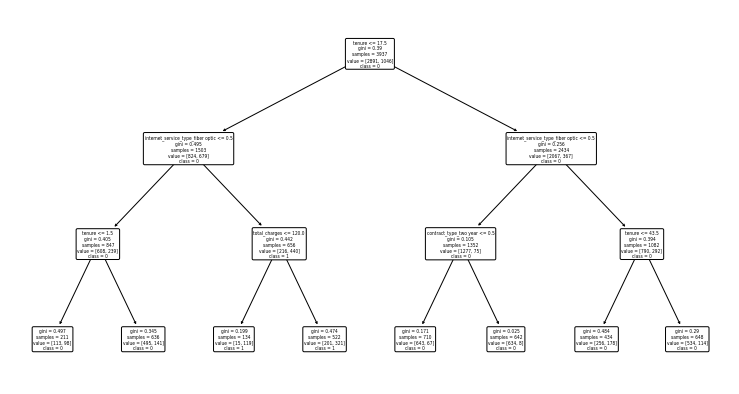

In [30]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)



**Make Predictions**

Classify each flower by its estimated species.

In [31]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

**Estimate Probability**

Estimate the probability of each species, using the training data.

In [32]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.58986175, 0.41013825],
       [0.9056338 , 0.0943662 ],
       [0.9056338 , 0.0943662 ],
       [0.77830189, 0.22169811],
       [0.98753894, 0.01246106]])

# **Evaluate Model**

**Compute the Accuracy**

Remember that Accuracy is the number of correct predictions over the number of total instances that have been evaluated.

In [33]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))



Accuracy of Decision Tree classifier on training set: 0.79


In [34]:
# confusion matrix

confusion_matrix(y_train, y_pred)



array([[2675,  216],
       [ 606,  440]])

In [35]:
y_train.value_counts()



0    2891
1    1046
Name: churn_encoded, dtype: int64

In [36]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)



,0,1
0,2675,216
1,606,440


**Create a classificaiton report**

Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. 
T
P
(
T
P
+
F
P
)

Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. 
T
P
(
T
P
+
F
N
)

f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better. 
∈
[
0
,
1
]

Support: number of occurrences of each class in where y is true.

In [37]:
print(classification_report(y_train, y_pred))



              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2891
           1       0.67      0.42      0.52      1046

    accuracy                           0.79      3937
   macro avg       0.74      0.67      0.69      3937
weighted avg       0.78      0.79      0.77      3937



In [38]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))



Accuracy of Decision Tree classifier on validate set: 0.78


In [39]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))



              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1239
           1       0.67      0.38      0.48       449

    accuracy                           0.78      1688
   macro avg       0.74      0.65      0.67      1688
weighted avg       0.77      0.78      0.76      1688

